## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
#later, cell requires random seed to be 0
#so everything that needs a seed will run with this seed
RANDOM_SEED = 0

#What fraction of data set should be held out for
#testing
TEST_SIZE = 0.2

## Prepare the data set

In [3]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [5]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [7]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [8]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [9]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [10]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


How was it determined that `['name','ticket', 'boat', 'body','home.dest']` are unnecessary variables?

They don't influence the value of the target, which is `survived`

In [11]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [12]:
target = 'survived'

In [13]:
vars_num = [var for var in data.columns if data[var].dtype != 'O' and var != target]

vars_cat = [var for var in data.columns if var not in vars_num and var != target]

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


In [14]:
#double checking
print("vars_num = ",vars_num)
print("vars_cat = ", vars_cat)

vars_num =  ['pclass', 'age', 'sibsp', 'parch', 'fare']
vars_cat =  ['sex', 'cabin', 'embarked', 'title']


### Find missing values in variables

In [15]:
# first in numerical variables

na_vars_num = [var for var in vars_num if data[var].isnull().sum() > 0]
na_vars_cat = [var for var in vars_cat if data[var].isnull().sum() > 0]
print("na_vars_num = ", na_vars_num)
print("na_vars_cat = ", na_vars_cat)

na_vars_num =  ['age', 'fare']
na_vars_cat =  ['cabin', 'embarked']


In [16]:
# now in categorical variables

na_vars_cat = [var for var in vars_cat if data[var].isnull().sum() > 0]
print("na_vars_cat = ", na_vars_cat)

na_vars_cat =  ['cabin', 'embarked']


### Determine cardinality of categorical variables

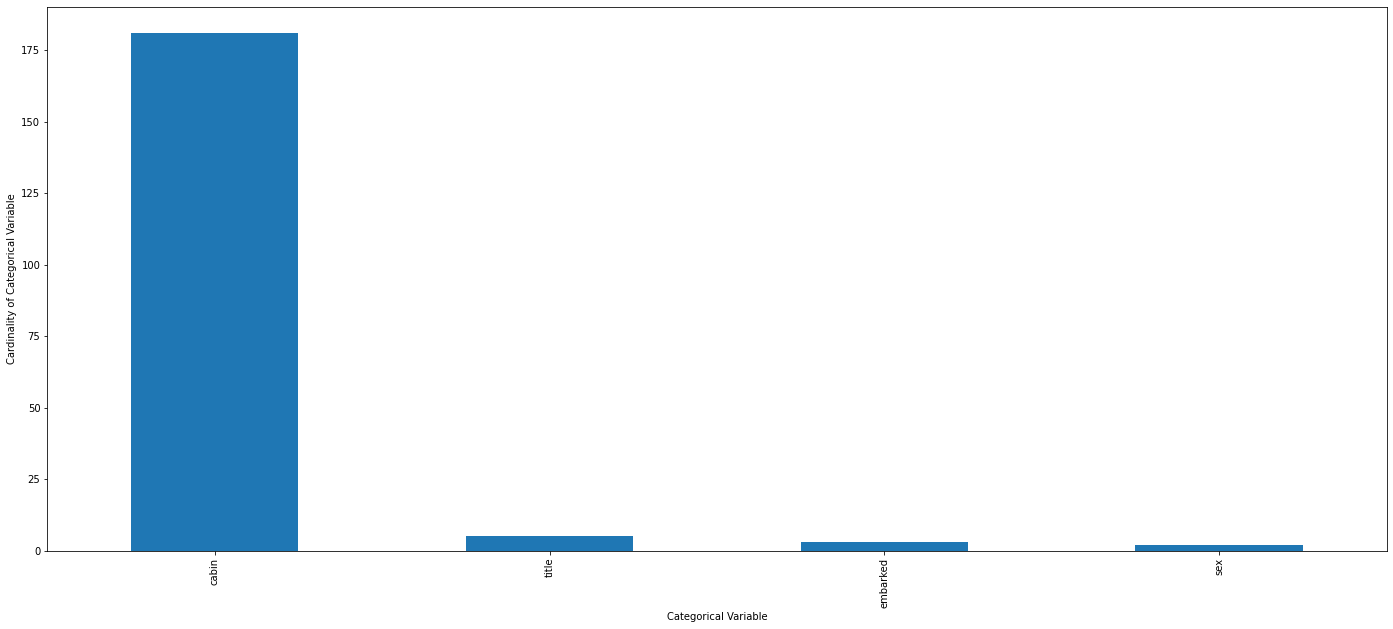

In [17]:
data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(24,10))
plt.ylabel("Cardinality of Categorical Variable")
plt.xlabel("Categorical Variable")
plt.show();

### Determine the distribution of numerical variables

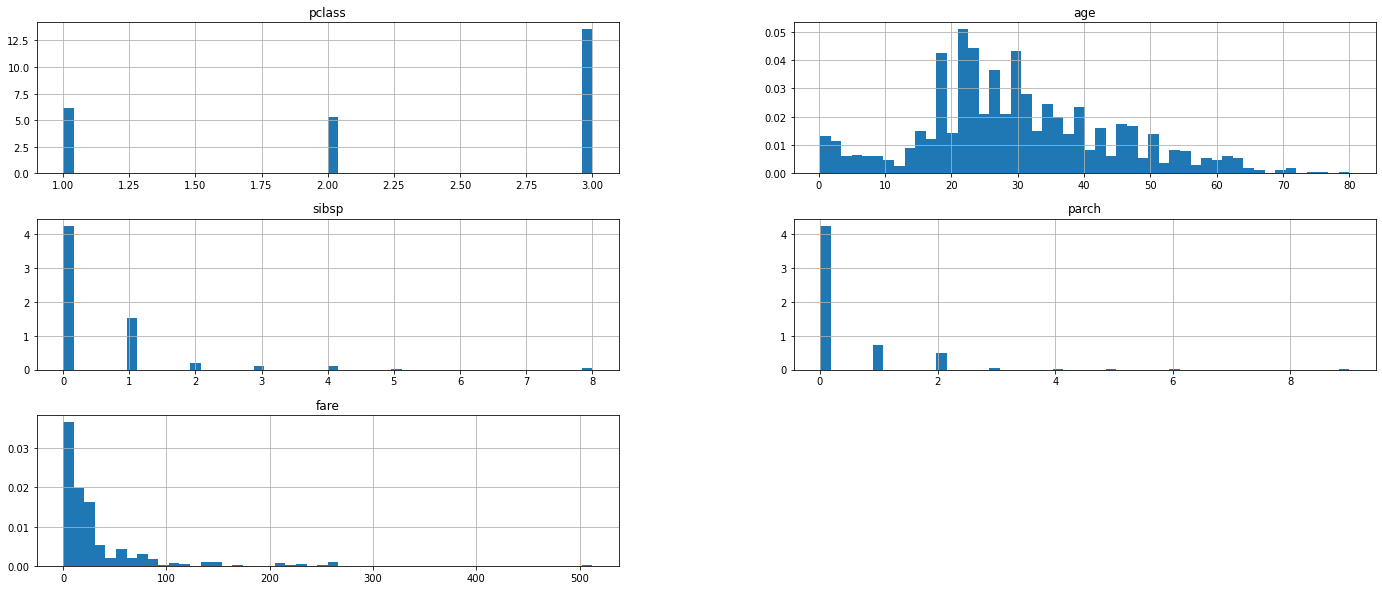

In [18]:
data[vars_num].hist(bins=50,density=True,figsize=(24,10));


In [19]:
def extract_letter_from_cabin(cabin_id):
    if type(cabin_id) == str:
        temp_m = re.search(r"^([a-zA-Z])\d+",cabin_id)
        if temp_m:
            return temp_m.group(1)
        else:
            return cabin_id
    else:
        return cabin_id

In [20]:
data["cabin"] = data["cabin"].apply(extract_letter_from_cabin)


In [21]:
#data.head()

### Replace Missing data in categorical variables with the string **Missing**

In [22]:
for na_var in na_vars_cat:
    data[na_var] = np.where(data[na_var].isnull(),"MISSING",data[na_var])
    

Only variable I see as being anywhere near normally distributed in `age`

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [23]:
#find rare lables in set of categorical variables
def print_rare_labels(thedf, the_var, rare_threshold = 0.01):
    temp_df = thedf.copy()
    
    tmp_pcts = temp_df.groupby(the_var)[the_var].count() / len(temp_df)
    
    return tmp_pcts[ tmp_pcts < rare_threshold]

for cat_var in vars_cat:
    print(print_rare_labels(data,cat_var),"\n")

Series([], Name: sex, dtype: float64) 

cabin
G    0.003820
T    0.000764
Name: cabin, dtype: float64 

embarked
MISSING    0.001528
Name: embarked, dtype: float64 

Series([], Name: title, dtype: float64) 



In [24]:
data.shape

(1309, 10)

In [25]:
#remove from training a test set to prevent overfitting
data = data[ (data["cabin"] != "G") & (data["cabin"] != "T") & (data["embarked"] != "MISSING")]


In [26]:
data.shape

(1301, 10)

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=TEST_SIZE,  # percentage of obs in test set
    random_state=RANDOM_SEED)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1040, 9), (261, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [28]:
X_train.head()



,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1067,3,female,22.0,0,0,7.7500,MISSING,S,Miss
1190,3,male,25.0,0,0,9.5000,MISSING,S,Mr
571,2,male,23.0,0,0,13.0000,MISSING,S,Mr
1257,3,female,9.0,1,1,15.2458,MISSING,C,Miss
494,2,female,24.0,1,1,37.0042,MISSING,C,Mrs


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [29]:
#not sure why we should grow the data frame by adding new columns which are binary flags indicating whether or not a corresponding column in the same row  isnull()

#create variable names for the binary missing indicator
na_vars_num_names = [var + '_na' for var in na_vars_num]

for na_var in na_vars_num:
    #at each row where na_var is null, replace it with the average of all values in column na_var
    median_for_na_var = X_train[na_var].median()
    X_train[na_var] = np.where(X_train[na_var].isnull(), median_for_na_var, X_train[na_var])
    X_test[na_var] = np.where(X_test[na_var].isnull(), median_for_na_var, X_test[na_var])


In [30]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1067,3,female,22.0,0,0,7.7500,MISSING,S,Miss
1190,3,male,25.0,0,0,9.5000,MISSING,S,Mr
571,2,male,23.0,0,0,13.0000,MISSING,S,Mr
1257,3,female,9.0,1,1,15.2458,MISSING,C,Miss
494,2,female,24.0,1,1,37.0042,MISSING,C,Mrs


In [31]:
X_train.shape

(1040, 9)

In [32]:
X_test.shape

(261, 9)

In [33]:
X_train.shape

(1040, 9)

In [34]:
X_test.shape

(261, 9)

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

We can't separately one-hot encode the categorical variables in the training and the test set
as the set of values for each categorical variable may not exist in both sets.

So to get around that, I combine the two sets before performing the one-hot encoding

There is no leakage of information between the two sets as I don't change which categorical variables exist in either set, I just make the encoding
*uniform* between the two sets.

In [35]:


X = pd.concat([X_train, X_test])

for cat_var in vars_cat:
    one_df = pd.get_dummies(X[cat_var], prefix=cat_var, drop_first=True)
    X = pd.concat([X, one_df], axis=1)
    X.drop([cat_var], axis=1, inplace=True)

X_train = X[ : X_train.shape[0] ]
X_test = X[ X_train.shape[0] : ]

In [36]:
X_train.shape

(1040, 18)

In [37]:
X_test.shape

(261, 18)

In [38]:
X_train

,pclass,age,sibsp,parch,fare,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_MISSING,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
1067,3,22.0,0,0,7.7500,0,0,0,0,0,0,1,0,1,1,0,0,0
1190,3,25.0,0,0,9.5000,1,0,0,0,0,0,1,0,1,0,1,0,0
571,2,23.0,0,0,13.0000,1,0,0,0,0,0,1,0,1,0,1,0,0
1257,3,9.0,1,1,15.2458,0,0,0,0,0,0,1,0,0,1,0,0,0
494,2,24.0,1,1,37.0042,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,3,25.0,0,0,7.8958,1,0,0,0,0,0,1,0,1,0,1,0,0
838,3,28.0,2,0,7.9250,1,0,0,0,0,0,1,0,1,0,1,0,0
1222,3,33.0,0,0,8.6625,1,0,0,0,0,0,1,0,0,0,1,0,0
562,2,30.0,0,0,12.3500,0,0,0,0,0,0,1,1,0,1,0,0,0


In [39]:
X_test

,pclass,age,sibsp,parch,fare,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_MISSING,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
583,2,40.0,0,0,15.7500,0,0,0,0,0,0,1,0,1,0,0,1,0
1019,3,24.0,0,0,7.8958,1,0,0,0,0,0,1,0,1,0,1,0,0
764,3,26.0,1,2,20.5750,1,0,0,0,0,0,1,0,1,0,1,0,0
689,3,22.0,1,0,7.2500,1,0,0,0,0,0,1,0,1,0,1,0,0
188,1,51.0,0,1,39.4000,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,3,28.0,8,2,69.5500,1,0,0,0,0,0,1,0,1,0,1,0,0
552,2,19.0,0,0,10.5000,1,0,0,0,0,0,1,0,1,0,1,0,0
924,3,34.5,0,0,7.8292,1,0,0,0,0,0,1,1,0,0,1,0,0
402,2,30.0,1,0,13.8583,0,0,0,0,0,0,1,0,0,1,0,0,0


Create list of new one-hot encoded variables

In [40]:
one_hot_variables = [var_name for var_name in X_train.columns if var_name not in vars_num]
one_hot_variables

['sex_male',
 'cabin_B',
 'cabin_C',
 'cabin_D',
 'cabin_E',
 'cabin_F',
 'cabin_MISSING',
 'embarked_Q',
 'embarked_S',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Other']

### Scale the variables

- Use the standard scaler from Scikit-learn

I don't normalized the OHE variables. Is it OK to do this? `TODO`: Research affect of normalizing OHE variables.

In [41]:
normalizer = StandardScaler()
normalizer.fit(X_train[vars_num])
X_train_normalized = pd.DataFrame(normalizer.transform(X_train[vars_num]),columns=pd.Series(vars_num))


In [42]:
X_train_normalized.shape

(1040, 5)

In [43]:
X_train_normalized.head()

,pclass,age,sibsp,parch,fare
0,0.847327,-0.602914,-0.480754,-0.427588,-0.502720
1,0.847327,-0.366063,-0.480754,-0.427588,-0.469511
2,-0.335519,-0.523963,-0.480754,-0.427588,-0.403093
3,0.847327,-1.629268,0.486334,0.739582,-0.360475
4,-0.335519,-0.445013,0.486334,0.739582,0.052427


In [44]:
X_train.shape

(1040, 18)

In [45]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_MISSING,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
1067,3,22.0,0,0,7.7500,0,0,0,0,0,0,1,0,1,1,0,0,0
1190,3,25.0,0,0,9.5000,1,0,0,0,0,0,1,0,1,0,1,0,0
571,2,23.0,0,0,13.0000,1,0,0,0,0,0,1,0,1,0,1,0,0
1257,3,9.0,1,1,15.2458,0,0,0,0,0,0,1,0,0,1,0,0,0
494,2,24.0,1,1,37.0042,0,0,0,0,0,0,1,0,0,0,0,1,0


In [46]:
X_train.drop(vars_num, axis=1, inplace=True)

/Users/magreen/Anaconda3-2020_07/envs/dmlenv/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
X_train.reset_index(inplace=True)

In [48]:
X_train.drop(["index"],axis=1, inplace=True)

In [49]:
X_train.head()

,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_MISSING,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,1,0,0,0,0,0,1,0,1,0,1,0,0
2,1,0,0,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0


In [50]:
X_train.shape

(1040, 13)

In [51]:
X_train2 = pd.concat([X_train_normalized, X_train], axis=1)


In [52]:
X_train2.shape

(1040, 18)

In [53]:
X_train = X_train2

In [54]:
X_train.shape

(1040, 18)

In [55]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_MISSING,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
0,0.847327,-0.602914,-0.480754,-0.427588,-0.502720,0,0,0,0,0,0,1,0,1,1,0,0,0
1,0.847327,-0.366063,-0.480754,-0.427588,-0.469511,1,0,0,0,0,0,1,0,1,0,1,0,0
2,-0.335519,-0.523963,-0.480754,-0.427588,-0.403093,1,0,0,0,0,0,1,0,1,0,1,0,0
3,0.847327,-1.629268,0.486334,0.739582,-0.360475,0,0,0,0,0,0,1,0,0,1,0,0,0
4,-0.335519,-0.445013,0.486334,0.739582,0.052427,0,0,0,0,0,0,1,0,0,0,0,1,0


In [56]:
X_test_normalized = pd.DataFrame(normalizer.transform(X_test[vars_num]),columns=pd.Series(vars_num))
X_test.drop(vars_num, axis=1, inplace=True)
X_test.reset_index(inplace=True)
X_test.drop(["index"],axis=1, inplace=True)
X_test2 = pd.concat([X_test_normalized, X_test], axis=1)
X_test = X_test2

/Users/magreen/Anaconda3-2020_07/envs/dmlenv/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
X_test.head()

,pclass,age,sibsp,parch,fare,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_MISSING,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
0,-0.335519,0.818193,-0.480754,-0.427588,-0.350907,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0.847327,-0.445013,-0.480754,-0.427588,-0.499954,1,0,0,0,0,0,1,0,1,0,1,0,0
2,0.847327,-0.287112,0.486334,1.906753,-0.259345,1,0,0,0,0,0,1,0,1,0,1,0,0
3,0.847327,-0.602914,0.486334,-0.427588,-0.512209,1,0,0,0,0,0,1,0,1,0,1,0,0
4,-1.518365,1.686647,-0.480754,0.739582,0.097891,0,0,0,1,0,0,0,0,1,0,0,1,0


In [58]:
X_test.shape

(261, 18)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [59]:
y_train.shape

(1040,)

In [60]:
X_train.shape

(1040, 18)

In [61]:
lr_model = LogisticRegression(random_state=RANDOM_SEED, C=0.0005)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [62]:
y_pred = lr_model.predict(X_test)

In [63]:
#y_pred

In [64]:
y_pred_proba = lr_model.predict_proba(X_test)

In [65]:
#y_pred_proba[:,1]

In [66]:
#y_pred_proba

In [67]:
#y_test

In [68]:
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("ROC AUC Score = ", roc_auc_score(y_test, y_pred_proba[:,1]))

Accuracy =  0.6053639846743295
ROC AUC Score =  0.8308427241548261


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**